# Fireveg DB - overview of trait coverage

Author: [José R. Ferrer-Paris](https://github.com/jrfep) and [Ada Sánchez-Mercado](https://github.com/adasanchez)

Date: January 2025

This Jupyter Notebook includes **R code to analyse and visualise** data exported from the Fireveg Database. 

Here we will read input from a public data record of the database to answer some questions about the data coverage of the database.

```mermaid
flowchart LR
    Litrev & Form  --> Fireveg --> DR --> Code --> Q1 & Q2 & Q3
    Q2 --> Q4 & Q5 & Q6
    Fireveg[(Fireveg\nDatabase)]
    Litrev[Field work\ndata stream] 
    Form[Existing sources\n data stream] 
    BioNet(BioNet Atlas\nSpecies list) 
    BioNet -.-> Fireveg
    DR[Exported\nData Record\nVersion 1.1]
    Code{R code\nfor analysis}:::ThisRepo
    Q1[Q1. Trait descriptions]:::ThisRepo
    Q2["Q2. Trait values\n(NSW plant species)"]:::ThisRepo
    Q3["Q3. ..."]    
    Q4["Q2.1 ..."]:::ThisRepo   
    Q5["Q2.2 ..."]:::ThisRepo
    Q6["Q2.3 etc."]:::ThisRepo
classDef ThisRepo fill:none,stroke:black,color:black;

```

## Set-up

### Load packages

In [1]:
library(ggplot2)
library(dplyr)
require(tidyr)
library(readr)
library(stringr)
library(waffle)
library(ggtext)
library(cowplot)
#library(forcats)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr



For [Markdown display from a code cell](https://stackoverflow.com/questions/35786496/using-r-in-jupyter-display-markdown-in-loop?rq=4).

In [2]:
library(IRdisplay)

### Paths for inputs and outputs

Locate the root directory of the repo

In [3]:
here::i_am("Notebooks/11-Overview-trait-information.ipynb")

here() starts at /Users/z3529065/proyectos/fireveg/fireveg-analysis



Relative path to local data files within project repository

In [4]:
data_dir <- here::here("data")
if (!dir.exists(data_dir))
    dir.create(data_dir)

### Read data from local folder

<div class="alert alert-info">
     <img src='../img/open-data-2.png' width=25 alt="open data icon"/>
Data for this Notebook is available from the following repositories:

> Ferrer-Paris, J. R., Keith, D., & Sánchez-Mercado, A. (2024, August 15). Export data records from Fire Ecology Traits for Plants database. Retrieved from [osf.io/h96q2](https://osf.io/h96q2/)

and 
> Ferrer-Paris, J. R.; Keith, D. (2024). Fire Ecology Traits for Plants: Database exports. figshare. Dataset. Retrieved from <https://doi.org/10.6084/m9.figshare.24125088.v2>
</div>


See notebook [00-Data-download](00-Data-download.ipynb) for instructions on how to download the data programatically with R.

The data is now available in our local data folder and we can use `read_csv` functions to read `CSV` files:

In [5]:
trait_data <- read_csv(here::here(data_dir, "figshare_data", "fireveg-trait-records.csv"), show_col_types = FALSE)

New names:
• `` -> `...1`


We can use `readRDS` to read this file format into our R session:

In [6]:
trait_info <- readRDS(here::here(data_dir,"Trait-info.rds"))

## Fireveg Database

### Trait descriptions

```mermaid
flowchart LR
     Fireveg --> DR --> Code --> Q1 & Q2 & Q3
    Q2 --> Q4 & Q5
    Fireveg[(Fireveg\nDatabase)]
   
    DR[Exported\nData Record\nVersion 1.1]
    Code{R code\nfor analysis}:::ThisRepo
    Q1[Q1. Trait descriptions]:::ThisRepo
    Q2["Q2. Trait coverage\n(NSW plant species)"]
    Q3["Q3. ..."]    
    Q4["Q4. ..."]   
    Q5["Q5. ..."]
classDef ThisRepo fill:none,stroke:black,color:black;

```

The data frame `trait_info` includes descriptions of all traits, here we show the priority traits that are already uploaded in the current version of the database.

In [7]:
tbl_trait_info <- trait_info %>% 
  filter(!is.na(priority)) %>%
  rowwise() %>% 
  mutate(Code=code, Trait=name, 
         Description = description,
            `Classification` = paste( 
              life_stage,
              life_history_process, 
              sep="/")) %>%
  ungroup() %>% 
    arrange(desc(life_history_process),Code) %>% 
  select(Code, Trait, Classification, Description) %>%
  knitr::kable()
    
display_markdown(paste(as.character(tbl_trait_info), collapse="\n"))

|Code   |Trait                                                |Classification              |Description                                                                                                                                   |
|:------|:----------------------------------------------------|:---------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------|
|surv1  |Resprouting - full canopy scorch                     |Standing plant/Survival     |Ordinal categories of survival and resprouting proportions for plants subjected to 100% canopy scorch                                         |
|surv4  |Regenerative Organ                                   |Standing plant/Survival     |NA                                                                                                                                            |
|surv5  |Standing plant longevity (Max)                       |Standing plant/Survival     |Age at which 50% of individuals in a cohort (excluding outliers) have died from senescence                                                    |
|surv6  |Seedbank half-life                                   |Seed/Survival               |Age at which 50% of a seed cohort in an in situ seedbank have decayed or become inviable                                                      |
|surv7  |Seed longevity                                       |Seed/Survival               |Age at which all seeds in a cohort (excluding outliers, e.g. 95th percentile) have decayed or become inviable                                 |
|repr2  |Post-fire flowering response                         |Standing plant/Reproduction |NA                                                                                                                                            |
|repr3  |Age at first flower production (from seed)           |Standing plant/Reproduction |The time taken for first individual in a recruitment cohort to produce their first reproductive organs (e.g. flowers, sporophylls)            |
|repr3a |Time to first postfire reproduction (from resprouts) |Standing plant/Reproduction |The time taken after fire for first reproductive organs (e.g. flowers, sporophylls) to be produced in a population of resprouting individuals |
|repr4  |Maturation age                                       |Standing plant/Reproduction |The time taken for 50% of individuals in a cohort [even aged recruits] to produce their first viable seed                                     |
|rect2  |Establishment pattern                                |Seedling/Recruitment        |The temporal pattern of seedling or clonal establishment through the fire cycle                                                               |
|grow1  |Age to develop regenerative/resistance organs        |Standing plant/Growth       |The time taken to develop organs or tissues enabling at least 50% of cohort survival when fully scorched in a fire                            |
|germ1  |Seedbank Type                                        |Seed/Germination            |NA                                                                                                                                            |
|germ8  |Seed dormancy type                                   |Seed/Germination            |NA                                                                                                                                            |
|disp1  |Propagule dispersal mode                             |Seed/Dispersal              |Propagule dispersal mode                                                                                                                      |

### Trait coverage

```mermaid
flowchart LR
     Fireveg --> DR --> Code --> Q1 & Q2 & Q3
    Q2 --> Q4 & Q5 & Q6
    Fireveg[(Fireveg\nDatabase)]
   
    DR[Exported\nData Record\nVersion 1.1]
    Code{R code\nfor analysis}:::ThisRepo
    Q1[Q1. ...]
    Q2["Q2. Trait coverage\n(NSW plant species)"]:::ThisRepo
    Q3["Q3. ..."] 
    Q4["Q4. Range of observed values for each trait"]:::ThisRepo  
    Q5["Q5. ..."]:::ThisRepo  
    Q6["Q6. ..."]:::ThisRepo   
classDef ThisRepo fill:none,stroke:black,color:black;

```

In [8]:
table(trait_data$`trait code`)


 disp1  germ1  germ8  rect2  repr2  repr3 repr3a  repr4  surv1  surv4  surv5 
 24174   3916   1170   1088    254    931    654     23  28574   1392   1261 

In [9]:
waffle_plot_trait <- function(x, trait_code, legend_rows = 1) {
    
trait_summary <- x |> 
    dplyr::filter(`trait code` %in% trait_code) |> 
    group_by(`norm value`) |>
    summarise(n = n_distinct(`scientific name`)) 

fig_caption <- sprintf("***%s*** (n = %s)",
                       trait_code, sum(trait_summary$n))

trait_summary |>
ggplot(aes(values = n, fill = `norm value`)) +
  geom_waffle(
    n_rows =10,        # Number of squares in each row
    color = "white",   # Border color
    flip = F, na.rm = TRUE, 
    make_proportional = T,
    show.legend = T) +
    coord_equal() +
    theme_void() +
    theme(legend.position="right", 
          legend.text=element_text(size=14),
          plot.title=element_markdown(size=16)) +
    labs(title=fig_caption) +
    guides(fill=guide_legend(title="", ncol = legend_rows))
}


In [10]:
trait_code <- "repr4"
trait_summary <- dplyr::filter(trait_data, `trait code` %in% trait_code) 
trait_summary <- trait_summary |> 
     mutate(`norm value`=str_replace_all(`norm value`,"\\[|\\]","")) |>
    separate(`norm value`,
                    into=c("best", "lower", "upper"), sep = ",") |>
    mutate(value = as.numeric(best)) |>
    filter(!is.na(value))
sprintf("***%s*** (n = %s)",
                       trait_code, n_distinct(trait_summary$`scientific name`))
    

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `value = as.numeric(best)`.
Caused by warning:
! NAs introduced by coercion”


[1] "***repr4*** (n = 11)"

In [11]:
trait_summary

...1,scientific name,current code (BioNET),original name,CAPS code,trait code,trait name,best,lower,upper,method,weight,source ref,other ref,recordid,value
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
63414,Acacia terminalis,3885,Acacia terminalis,3885,repr4,Maturation age,6,None,None,NA,1,NSWFFRDv2.1,['EcoGIS 2002'],1,6
63415,Actinotus helianthi,1094,Actinotus helianthi,1094,repr4,Maturation age,4,3,None,NA,1,NSWFFRDv2.1,['Benson 1985'],2,4
63418,Conospermum ericifolium,9976,Conospermum ericifolium,9976,repr4,Maturation age,4,None,5,NA,1,NSWFFRDv2.1,['Benson McDougall Ecology Sydney Plant Species Cunn'],5,4
63421,Grevillea caleyi,5365,Grevillea caleyi,5365,repr4,Maturation age,3,None,None,NA,1,NSWFFRDv2.1,['RP Grevillea caleyi'],8,3
63423,Grevillea linearifolia,5381,Grevillea linearifolia,5381,repr4,Maturation age,5,None,None,NA,1,NSWFFRDv2.1,['Kubiak 2009'],10,5
63425,Grevillea sericea,5399,Grevillea sericea,5399,repr4,Maturation age,6,None,None,NA,1,NSWFFRDv2.1,['Benson 1986'],13,6
63429,Mitrasacme polymorpha,3595,Mitrasacme polymorpha,3595,repr4,Maturation age,1,None,None,NA,1,NSWFFRDv2.1,['EcoGIS 2002'],16,1
63430,Petrophile pulchella,5479,Petrophile pulchella,5479,repr4,Maturation age,9,None,None,NA,1,NSWFFRDv2.1,['Benson 1986'],17,9
63432,Platysace linearifolia,1145,Platysace linearifolia,1145,repr4,Maturation age,4,None,None,NA,1,NSWFFRDv2.1,['Benson 1985'],19,4


In [12]:
box_plot_trait <- function(x, trait_code) {
    trait_summary <- dplyr::filter(x, `trait code` %in% trait_code) 
    fig_caption <- sprintf("***%s*** (n = %s)",
                       trait_code, n_distinct(trait_summary$`scientific name`))
    
    trait_summary <- trait_summary |> 
     mutate(`norm value`=str_replace_all(`norm value`,"\\[|\\]","")) |>
    separate(`norm value`,
                    into=c("best", "lower", "upper"), sep = ",") |>
    mutate(best = as.numeric(best),
          lower = as.numeric(lower),
          upper = as.numeric(upper)) |>
    pivot_longer(cols = c("best","lower","upper"),
                 names_to = "bound", values_to = "value")

    
    ggplot(filter(trait_summary, !is.na(value) & bound %in% "best")) +
    geom_histogram(aes(x=value), bins = 10) +
    #scale_y_log10() +
    theme_minimal() +
    theme(plot.title=element_markdown(size=16)) +
    labs(title=fig_caption) 
    }

In [13]:
plot_rect2 <- waffle_plot_trait(trait_data, "rect2")
plot_repr2 <- waffle_plot_trait(trait_data, "repr2")
plot_surv4 <- trait_data |> 
    mutate(`norm value`= case_when(`norm value` %in% "Long rhizome or root sucker" ~ "Long rhizome",
                                  TRUE ~ `norm value`)) |> 
    waffle_plot_trait( "surv4")
plot_germ1 <- waffle_plot_trait(trait_data, "germ1", legend_rows = 1)
plot_germ8 <- waffle_plot_trait(trait_data, "germ8")
plot_surv1 <- waffle_plot_trait(trait_data, "surv1", legend_rows = 1)
plot_disp1 <- waffle_plot_trait(trait_data, "disp1", legend_rows = 1)

plot_repr3 <- box_plot_trait(trait_data, "repr3")
plot_repr3a <- box_plot_trait(trait_data, "repr3a")
plot_repr4 <- box_plot_trait(trait_data, "repr4")
plot_surv5 <- box_plot_trait(trait_data, "surv5")

Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `best = as.numeric(best)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”
Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `best = as.numeric(best)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”
Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `best = as.numeric(best)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”
Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `best = as.numeric(best)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”


Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_text()`).”


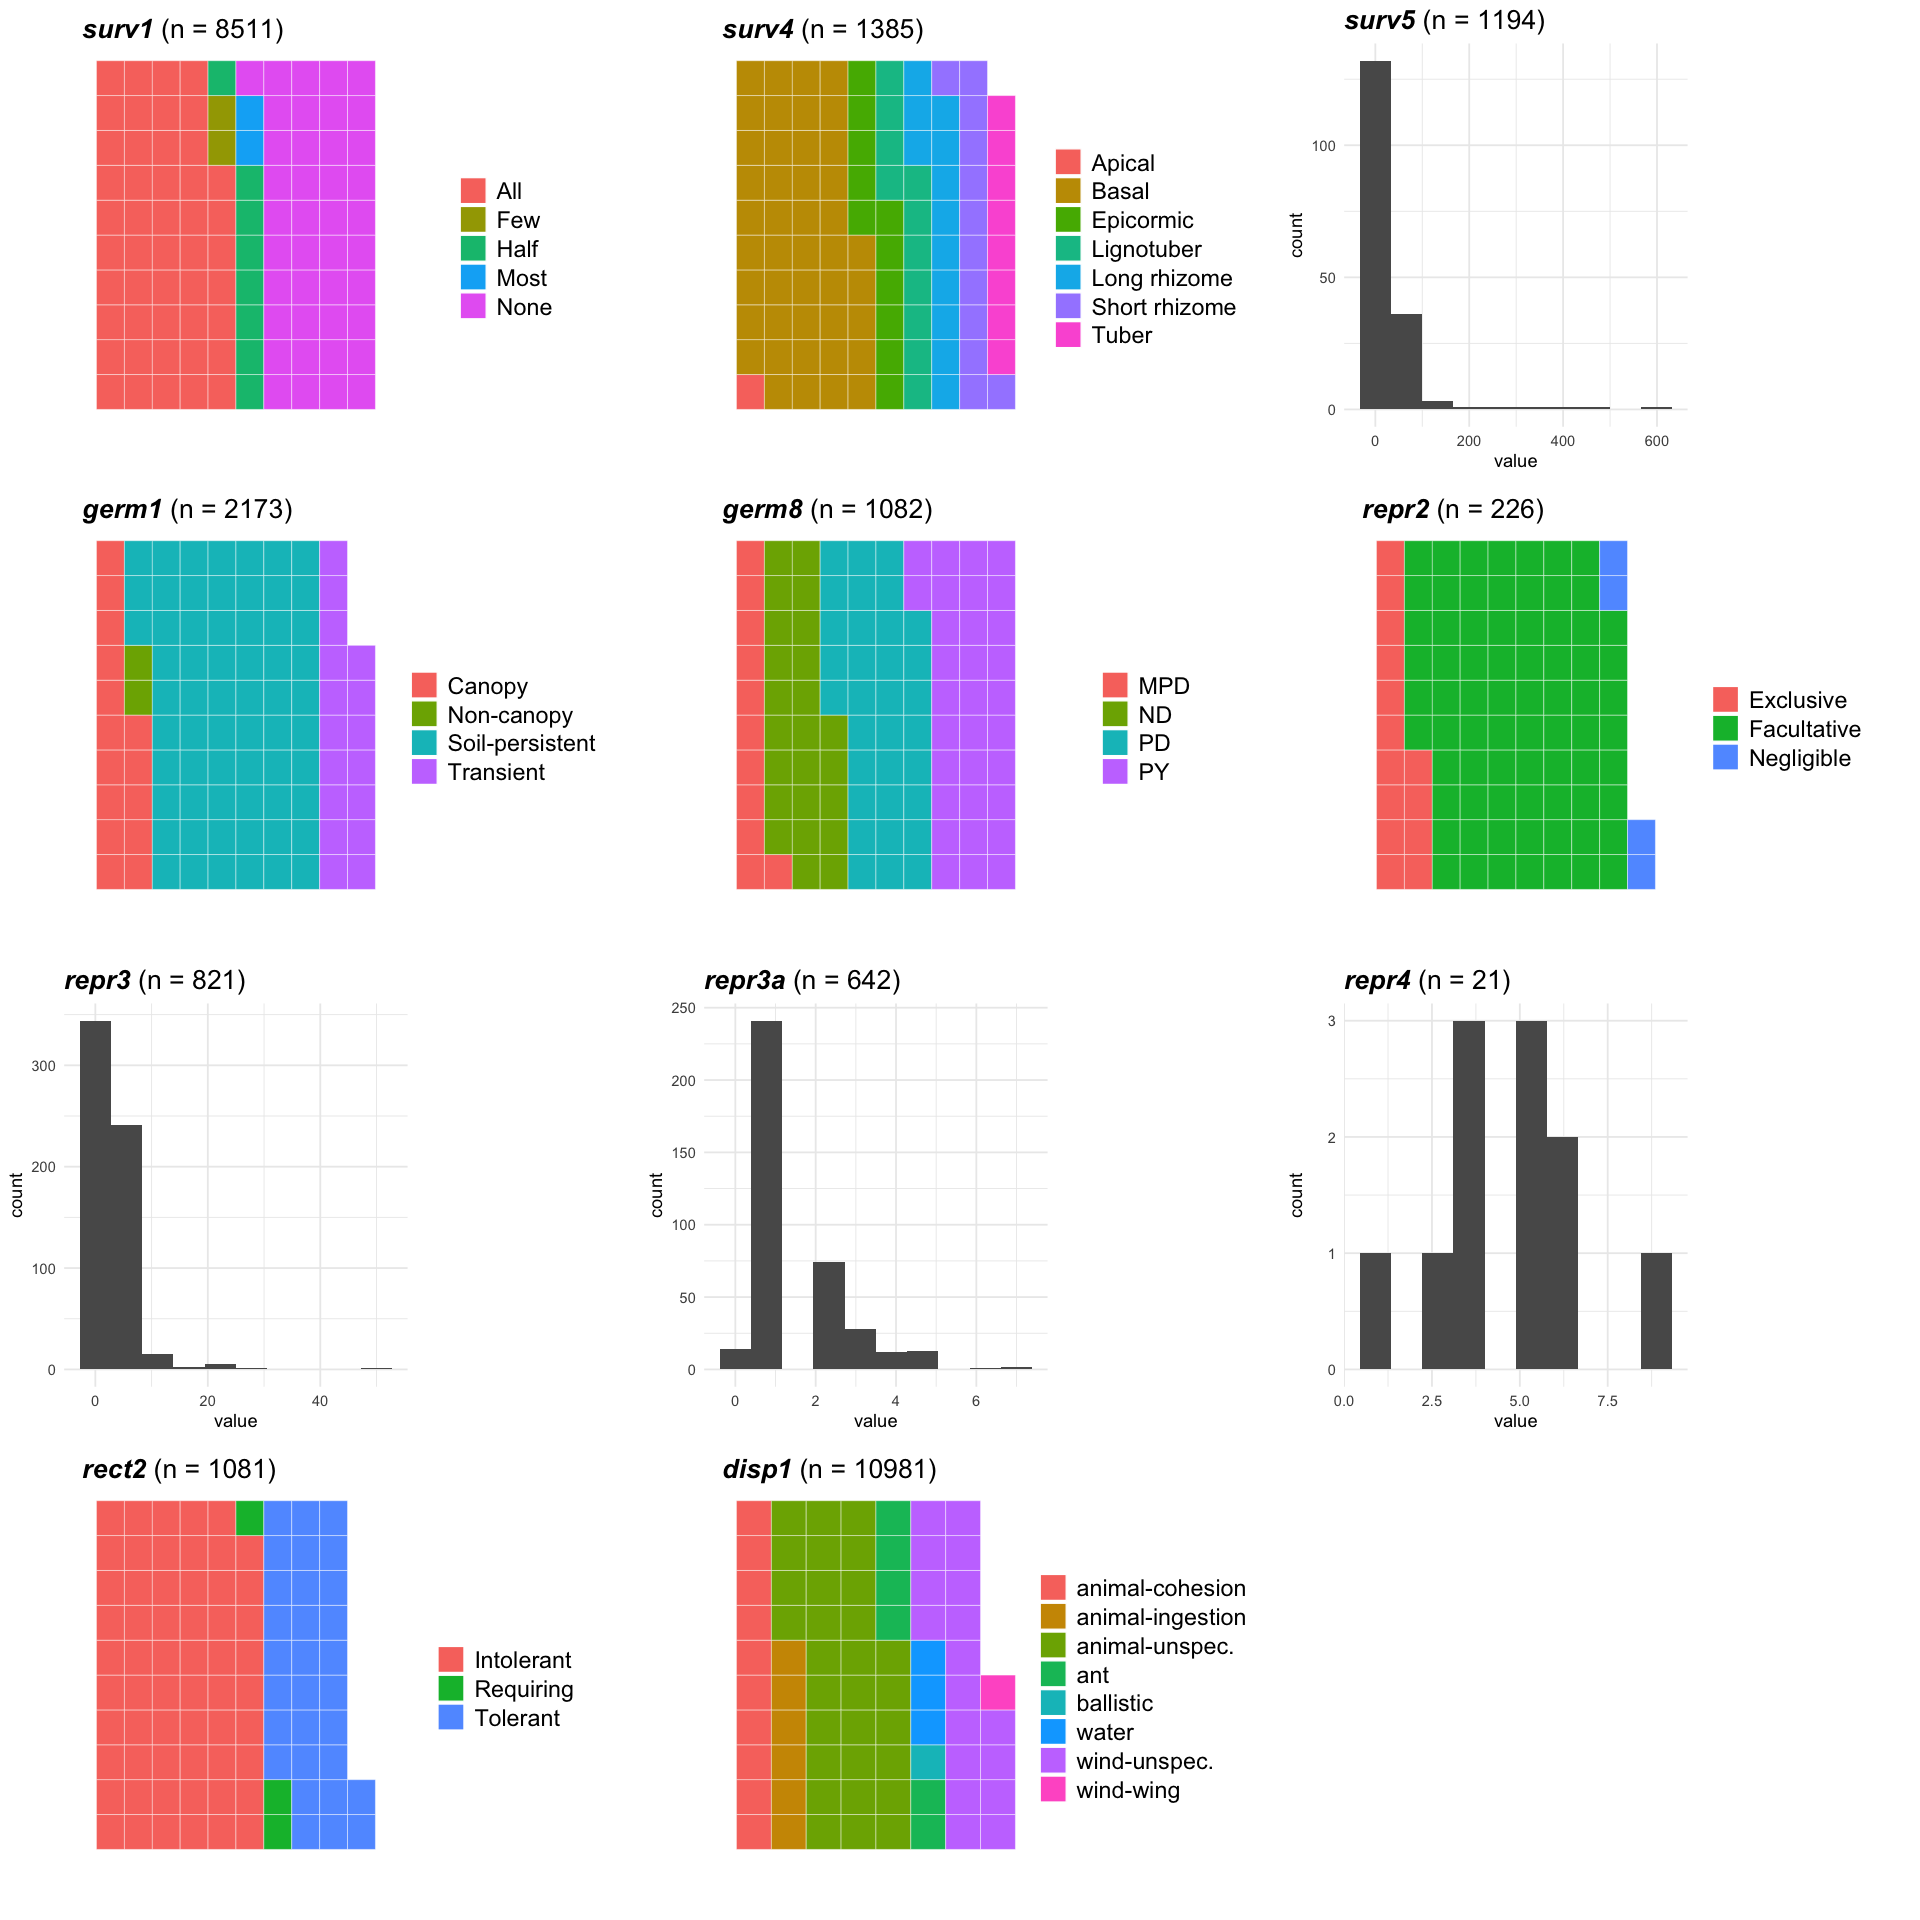

In [14]:
options(repr.plot.width=16, repr.plot.height=16) # Make plot larger

plot_grid(plot_surv1, plot_surv4, plot_surv5,
          plot_germ1, plot_germ8,
          plot_repr2, plot_repr3, plot_repr3a, plot_repr4,
          plot_rect2,
          plot_disp1, 
           align = "vh",
          labels = NA,
         ncol = 3)


## That is it for now!

✅ Job done! 😎👌🔥

You can:
- go [back home](../Instructions-and-workflow.ipynb),
- continue navigating the repo on [GitHub](https://github.com/ces-unsw-edu-au/fireveg-analysis)
- continue exploring the repo on [OSF](https://osf.io/h96q2/).
- visit the database at <http://fireecologyplants.net>

### R session information

In [16]:
date()

[1] "Sat Jan 25 18:19:53 2025"

In [17]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS 15.2

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_AU.UTF-8/en_AU.UTF-8/en_AU.UTF-8/C/en_AU.UTF-8/en_AU.UTF-8

time zone: Australia/Sydney
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] IRdisplay_1.1 cowplot_1.1.1 ggtext_0.1.2  waffle_1.0.2  stringr_1.5.1
[6] readr_2.1.5   tidyr_1.3.0   dplyr_1.1.4   ggplot2_3.5.0

loaded via a namespace (and not attached):
 [1] utf8_1.2.4         generics_0.1.3     xml2_1.3.6         stringi_1.8.4     
 [5] extrafontdb_1.0    hms_1.1.3          digest_0.6.37      magrittr_2.0.3    
 [9] evaluate_1.0.3     grid_4.3.1         RColorBrewer_1.1-3 pbdZMQ_0.3-10    

In [18]:
last_fire <- sites_record |>
  mutate(last_fire = case_when(
      `Time since last fire (days)` %in% c(NA,"0 days","ERROR: mismatching dates") ~ 'unknown',
      !grepl("year", `Time since last fire (days)`) ~ 'recent',
      grepl("^(2 years|3 years|1 year)", `Time since last fire (days)`) ~ 'recent',
      TRUE ~ "older"
  )) |>
  select(`Survey`,`Site label`, `Visit date`, `Time since last fire (days)`, "last_fire")  |>
  rename(visit_id = `Site label`, visit_date = `Visit date`)

ERROR: Error: object 'sites_record' not found


In [ ]:
last_fire |> slice_sample(n=5)

In [ ]:
sites_record |> slice_sample(n=5)

In [ ]:
# 3. Calculate traits by species -----
# Number of individuals with a given trait. All the spp in the datset
full_spp_trait <- field_records |>
    filter(!is.na(species_code)) |>
  mutate(spp_type = case_when(
    resprout_organ %in% c("None") ~ "Seeder", 
    TRUE ~ "Resprouter")
  ) |>
 # left_join(species_list, by = c("species" = "Scientific name (as entered)")) |> # Add family information
  left_join(distinct(species_list), by = c("species_code" = "CAPS code")) |> # Add family information
  left_join(last_fire, by = c("visit_id","visit_date")) |>  # Add fire information
  filter(last_fire == "recent") |> # Calculate the metrics only for these sites with time since last fire <= 3 years
  group_by(Family, species, Survey, visit_id, visit_date, spp_type, resprout_organ, seedbank) |>
  summarise(n1 = sum(resprouts_live, na.rm = TRUE),         # N total live resprouts (N1)
            n2 = sum(resprouts_reproductive, na.rm = TRUE), # N reproductive live resprouts (N2)
            n5 = sum(recruits_live, na.rm = TRUE),          # N total live recruits (N5)
            n6 = sum(recruits_reproductive, na.rm = TRUE),  # N reproductive live recruits (N6)
            n7 = sum(resprouts_died, na.rm = TRUE),         # N Dead resprouts (N7). This variable is all 0
            n8 = sum(recruits_died, na.rm = TRUE),          # N dead recruits (N8)
            n9 = sum(resprouts_kill, na.rm = TRUE),      # N fire killed resprouts (N9)
            .groups = "drop"
) |>
  mutate(prop_fire_mortality = n9 /(n1 + n7 + n9),
         prop_sprout_surv = n7/ (n1 + n7),
         seed_adult = (n5 + n8) / (n1 + n7),
         pro_recruit_surv = n5 / (n5 + n8),
         prop_reprod_recruit = n6 / max(n5)
  ) |>
  as_tibble() 


In [ ]:
full_spp_trait |> slice_sample(n=5)

In [ ]:
full_spp_trait |> select(species) |> n_distinct()
full_spp_trait |> select(species,spp_type) |> n_distinct()


In [ ]:
top_species

In [ ]:

# 5. Select the top 5 families -----
# Which are the families with more spp?
top_families <- species_list |>
    filter(!is.na(Family)) |>
  group_by(Family) |>
  summarise(
    n_spp = n_distinct(`Scientific name (as entered)`)
  ) |>
  arrange(desc(n_spp)) |>
  slice_head( n = 5 ) |>
  pull(Family)


